<a href="https://colab.research.google.com/github/serena526/.github/blob/main/logistic_regrression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest

In [2]:

fuel = pd.read_csv("/content/owid-energy-data.csv")
print('\n------------Column Names------------------\n')
print(fuel.info())
print(fuel.columns)


------------Column Names------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB
None
Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)


In [5]:

# drop unwanted columns
fuel_drop_col = fuel.drop(['iso_code','other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','net_elec_imports','net_elec_imports_share_demand','greenhouse_gas_emissions','electricity_demand','coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh', 'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec', 'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption', 'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh', 'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'fossil_cons_change_pct', 'fossil_share_energy', 'fossil_cons_change_twh', 'fossil_fuel_consumption', 'fossil_energy_per_capita', 'fossil_share_elec', 'gas_share_elec', 'gas_cons_change_pct', 'gas_share_energy', 'gas_cons_change_twh', 'gas_consumption', 'gas_elec_per_capita', 'gas_energy_per_capita', 'gas_production', 'gas_prod_per_capita', 'hydro_share_elec', 'hydro_cons_change_pct', 'hydro_share_energy', 'hydro_cons_change_twh', 'hydro_consumption', 'hydro_elec_per_capita', 'hydro_energy_per_capita', 'low_carbon_share_elec', 'low_carbon_electricity', 'low_carbon_elec_per_capita', 'low_carbon_cons_change_pct', 'low_carbon_share_energy', 'low_carbon_cons_change_twh', 'low_carbon_consumption', 'low_carbon_energy_per_capita', 'nuclear_share_elec', 'nuclear_cons_change_pct', 'nuclear_share_energy', 'nuclear_cons_change_twh', 'nuclear_consumption', 'nuclear_elec_per_capita', 'nuclear_energy_per_capita', 'oil_share_elec', 'oil_cons_change_pct', 'oil_share_energy', 'oil_cons_change_twh', 'oil_elec_per_capita', 'oil_energy_per_capita', 'oil_prod_per_capita', 'other_renewables_elec_per_capita', 'other_renewables_share_elec', 'other_renewables_cons_change_pct', 'other_renewables_share_energy', 'other_renewables_cons_change_twh', 'other_renewable_consumption', 'other_renewables_energy_per_capita', 'per_capita_electricity', 'population', 'primary_energy_consumption', 'renewables_elec_per_capita', 'renewables_share_elec', 'renewables_cons_change_pct', 'renewables_share_energy', 'renewables_cons_change_twh', 'renewables_consumption', 'renewables_energy_per_capita', 'solar_share_elec', 'solar_cons_change_pct', 'solar_share_energy', 'solar_cons_change_twh', 'solar_consumption', 'solar_elec_per_capita', 'solar_energy_per_capita', 'gdp', 'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy', 'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita', 'wind_energy_per_capita'], axis = 1)


# drop records with null values
fuel_drop_na = fuel_drop_col.dropna()


# drop records with oil_consumption = 0
fuel_drop_oil_zero = fuel_drop_na[fuel_drop_na['oil_consumption'] > 0]


# drop records with country = world, because we want individual countries samples
fuel_filtered = fuel_drop_oil_zero[fuel_drop_oil_zero['country'] != 'World']
print('\n----------Record counts by country in all countries dataset--------------------\n')
print(fuel_filtered[['oil_consumption']].groupby(fuel_filtered['country']).agg(['count']))


# Adding group indicator
fuel_filtered['group']=fuel_filtered['year'].apply(lambda x: 0 if int(x)<=1992 else 1)
print('\n----------All countries dataset Dimension--------------------\n')
print(fuel_filtered.info())
print('\n----------Sample records--------------------\n')
print(fuel_filtered.tail(10))


----------Record counts by country in all countries dataset--------------------

                              oil_consumption
                                        count
country                                      
Africa                                     38
Algeria                                    22
Argentina                                  38
Asia                                       38
Australia                                  38
...                                       ...
United States                              38
Upper-middle-income countries              38
Uzbekistan                                 22
Venezuela                                  22
Vietnam                                    38

[89 rows x 1 columns]

----------All countries dataset Dimension--------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 230 to 21318
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------            

<ipython-input-5-075d61e76312>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_filtered['group']=fuel_filtered['year'].apply(lambda x: 0 if int(x)<=1992 else 1)


In [6]:
# United States Dataset - group A

# filter record before & after 2000
before1992 = fuel_filtered[fuel_filtered['group'] == 0]

# Print "before2000" dataframe dimensions & sample records
print('\n---------------before year 1992------------------\n')

before1992.info()
print('\n')
print(before1992.head())

# Get descriptive statistics of the united states groups
print('\n----descriptive statistics of the before year 1992 group------------\n')
print(stats.describe(before1992['oil_consumption']))


---------------before year 1992------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 230 to 21288
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   372 non-null    object 
 1   year                      372 non-null    int64  
 2   electricity_share_energy  372 non-null    float64
 3   fossil_elec_per_capita    372 non-null    float64
 4   oil_consumption           372 non-null    float64
 5   oil_production            372 non-null    float64
 6   group                     372 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 23.2+ KB


    country  year  electricity_share_energy  fossil_elec_per_capita  \
230  Africa  1985                    11.585                 363.062   
231  Africa  1986                    11.840                 363.181   
232  Africa  1987                    11.902                 378.341

In [7]:
# United States Dataset - Group B

# filter record before & after 2000
after1992 = fuel_filtered[fuel_filtered['group'] == 1]

# Print "after2000" dataframe dimensions & sample records
print('\n---------------after year 1992------------------\n')

after1992.info()
print('\n')
print(after1992.head())

# Get descriptive statistics of the united states groups
print('\n----descriptive statistics of the after year 1992 group-----------\n')
print(stats.describe(after1992['oil_consumption']))


---------------after year 1992------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 238 to 21318
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   2229 non-null   object 
 1   year                      2229 non-null   int64  
 2   electricity_share_energy  2229 non-null   float64
 3   fossil_elec_per_capita    2229 non-null   float64
 4   oil_consumption           2229 non-null   float64
 5   oil_production            2229 non-null   float64
 6   group                     2229 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 139.3+ KB


    country  year  electricity_share_energy  fossil_elec_per_capita  \
238  Africa  1993                    12.789                 395.924   
239  Africa  1994                    12.819                 398.703   
240  Africa  1995                    12.720                 399.45

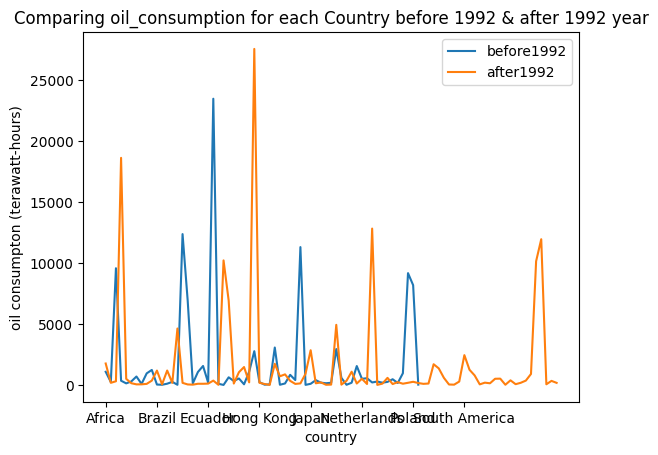

In [9]:
fig = fuel_filtered[fuel_filtered.group==0][
    ['country', 'oil_consumption']].groupby('country').mean().plot()
fuel_filtered[fuel_filtered.group==1][
    ['country', 'oil_consumption']].groupby('country').mean().plot(ax=fig)
plt.legend(['before1992','after1992'])
plt.title('Comparing oil_consumption for each Country before 1992 & after 1992 year')
plt.ylabel('oil consumpton (terawatt-hours)')
plt.show()


-------------Histogram Plots-----------------



array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

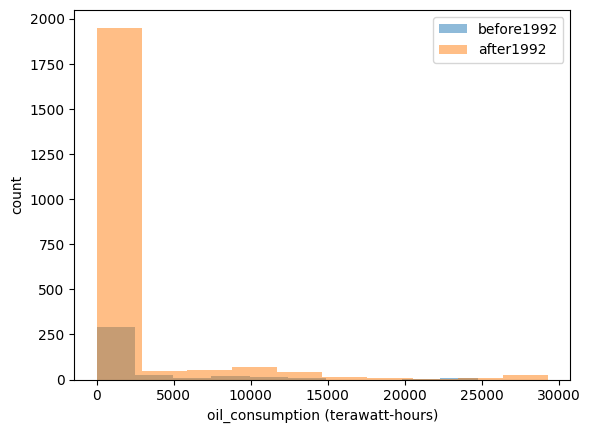

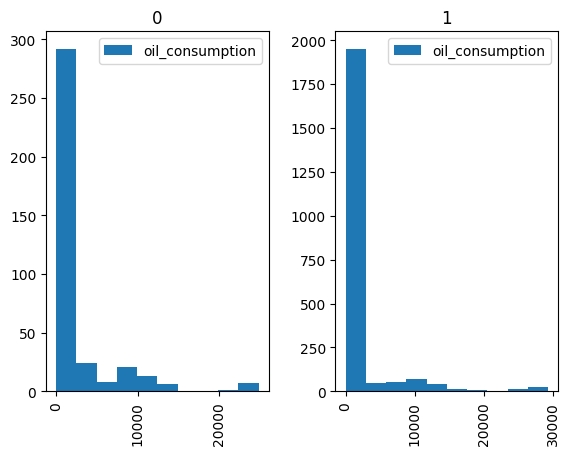

In [12]:
print('\n-------------Histogram Plots-----------------\n')

# Plot United States histogram
plt.hist(before1992['oil_consumption'], alpha = .5)
plt.hist(after1992['oil_consumption'], alpha = .5)
plt.legend(['before1992', 'after1992'])
plt.xlabel('oil_consumption (terawatt-hours)')
plt.ylabel('count')

# comparing the distribution by groups for the United States oil_consumption variable
fuel_filtered['oil_consumption'].hist(by = fuel_filtered['group'], legend=' ')




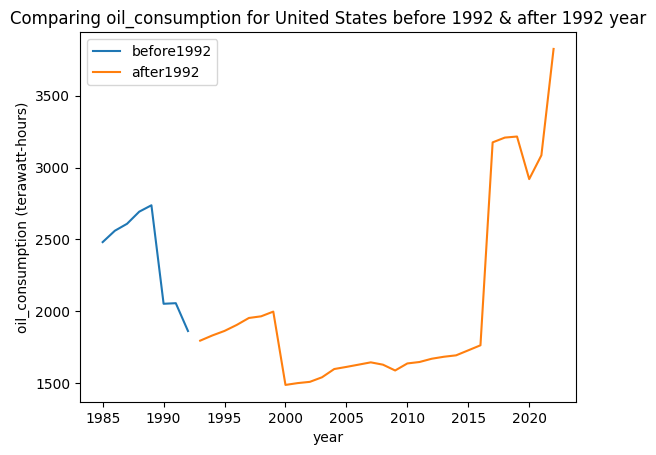

In [13]:
# Comparing oil_consumption for United States before 1992 & after 1992 year
fig = fuel_filtered[fuel_filtered.group==0][
    ['year', 'oil_consumption']].groupby('year').mean().plot()
fuel_filtered[fuel_filtered.group==1][
    ['year', 'oil_consumption']].groupby('year').mean().plot(ax=fig)
plt.legend(['before1992','after1992'])
plt.title('Comparing oil_consumption for United States before 1992 & after 1992 year')
plt.ylabel('oil_consumption (terawatt-hours)')
plt.show()